# Procesamiento de Imágenes Digitales

Visión Computacional 2019-20 <br>
Practica 1. 3
de octubre de 2019

Autor1:<br>
Autor2:

## Objetivos


Los objetivos de esta práctica son:
* Programar algunas de las rutinas de transformaciones puntuales de procesamiento de imágenes y analizar el resultado de su aplicación.
* Repasar algunos conceptos de filtrado de imágenes y programar algunas rutinas para suavizado y extracción de bordes.
* Implementar un algoritmo de segmentación de imágenes y otro de extracción de líneas mediante la transformada de Hough.

## Requerimientos

Para esta práctica es necesario disponer del siguiente software:
* Python 2.7 ó 3.X, preferiblemente el segundo
* Jupyter http://jupyter.org/.
* Los paquetes ``python-pip`` y/o ``python-pip3`` y el paquete "PyMaxFlow"
* Las librerías científicas de Python: NumPy (``python-numpy``), SciPy (``python-scipy``) y Matplotlib (``python-matplotlib``).
* El paquete ``python-pygame``
* La librería OpenCV, que puedes instalar desde el paquete ``python-opencv``.

Las versiones preferidas del entorno de trabajo puedes consultarlas en el Aula Virtual en el archivo "ConfiguracionPC2018.txt". 

El material necesario para la práctica se puede descargar del Aula Virtual.

## Condiciones

* La fecha límite de entrega será el martes 23 de octubre a las 23:55.
* La entrega consiste en dos archivos con el código, resultados y respuestas a los ejercicios:
  1. Un "notebook" de Jupyter con el fuente y los resultados (ejecuta "Restart & Run all" antes de guardar)
  2. Un documento "pdf" generado a partir del fuente de Jupyter, por ejemplo usando el comando ``jupyter nbconvert --execute --to pdf notebook.ipynb``. Asegúrate de que el documento "pdf" contiene todos los resultados correctamente ejecutados (previamente ejecuta en el menú "Kernel" la opción "Restart & Run All").
* Las respuestas a los ejercicios debes introducirlas en tantas celdas de código o texto como creas necesarias, insertadas inmediatamente después de  un enuciado y antes del siguiente.
* Las prácticas puede realizarse en parejas. Sólo es necesario que uno de los miembros del equipo entregue la práctica.

## Instala el entorno de trabajo

1. Instala el entorno de trabajo.

    ``apt install python
    apt install python-scipy
    apt install python-numpy
    apt install python-matplotlib
    apt install python-opencv
    apt install jupyter
    apt install jupyter-nbconvert``

    Para para trabajar con la versión 3.X de Python, basta sustituir la palabra "python" por "python3" en los comandos anteriores.

2. Instala el paquete PyMaxflow

   ``pip install PyMaxflow`` o ``pip3 install PyMaxflow``
   
   Si no tienes el paquete "pip" debes instalarlo: ``apt install python-pip`` o ``apt install python3-pip``
3. Instala el paquete "pygame"

    ``apt install python-pygame`` 
    
    En Python 3.X, la versión 18.04 de Ubuntu no tiene el paquete "python3-pygame" pero puedes instalarlo con la herramienta pip: ``pip install pygame``

## Transformaciones puntuales

En este apartado te recomiendo que uses al menos la imagen indicada, que puedes encontrar en el directorio de imágenes
del aula virtual. También puedes probar con otras que te parezcan interesantes.

**Ejercicio 1.** Carga la imagen ``escilum.tif``. Calcula
y muestra su histograma con la función ``hist()`` de
``matplotlib.pyplot``. A la vista del histograma, discute
qué problema tiene la imagen para analizar visualmente la
región inferior izquierda.

In [1]:
import cv2

**Ejercicio 2.** Escribe una función ``eq_hist(histograma)``
que calcule la función de transformación puntual que ecualiza el histograma.
Aplica la función de transformación a la imagen anterior.
Calcula y muestra nuevamente el histograma y la imagen
resultantes.
Discute los resultados obtenidos. ¿Cuál sería el resultado si
volviésemos a ecualizar la imagen resultante?

##  Filtrado

Para realizar las convoluciones utiliza la función ``convolve`` o ``convolve1d`` de ``scipy.ndimage``.


Carga y muestra las imágenes ``escgaus.bmp`` y ``escimp5.bmp`` que están contaminadas respectivamente
con ruido de tipo gaussiano e impulsional. En los siguientes ejercicios también también puedes utilizar otras imágenes
que te parezcan interesantes.

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

escgaus = plt.imread("imagenes/escgaus.bmp")
escimp5 = plt.imread("imagenes/escimp5.bmp")
telefonica = plt.imread("imagenes/telefonica.jpg")

fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].imshow(escgaus)
axs[1].imshow(escimp5)
axs[2].imshow(telefonica)
plt.show()

<Figure size 1500x600 with 3 Axes>

In [4]:
from scipy.ndimage import convolve, convolve1d

**Ejercicio 3.** Escribe una función ``masc_gaus(sigma, n)``
que construya una máscara de una dimensión de un filtro
gaussiano de tamaño *n* y varianza σ. Filtra las imágenes
anteriores con filtros gaussianos bidimensionales de diferentes tamaños
de *n*, y/o σ.

En este ejercicio tenéis que implementar vosotros la función que construye la máscara. No podéis usar funciones que construyan la máscara o realicen el filtrado automáticamente.

Muestra cómo afecta este filtrado a los dos tipos de ruido que contaminan las imágenes anteriores y discute los resultados. Pinta alguna de las máscaras utilizadas.

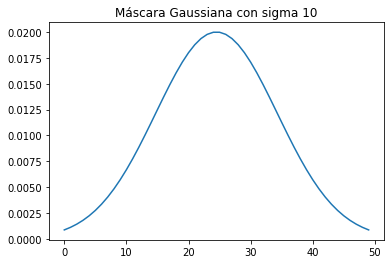

In [5]:
def gauss(x, sigma):
    return np.exp(-1/2 * (x/ sigma)** 2)

def masc_gaus(sigma, n):
    pos = np.linspace(-n/2, n/2, n)
    return np.array([gauss(x, sigma) / n for x in pos])

plt.title("Máscara Gaussiana con sigma 10")
plt.plot(masc_gaus(10, 50))
plt.show()

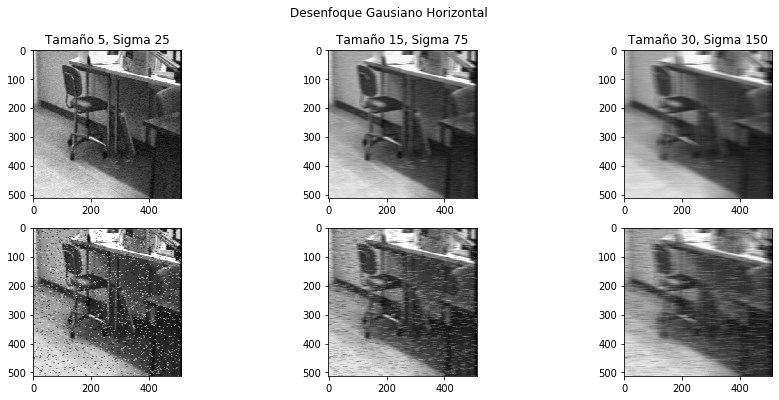

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
fig.suptitle("Desenfoque Gausiano Horizontal")

for i, x in enumerate((5, 15, 30)):
    sigma = x * 5
    mask = masc_gaus(sigma, x)


    axs[0][i].imshow(convolve1d(escgaus, weights=mask), cmap='gray', vmin=0, vmax=255)
    axs[1][i].imshow(convolve1d(escimp5, weights=mask), cmap='gray', vmin=0, vmax=255)

    axs[0][i].title.set_text('Tamaño {}, Sigma {}'.format(x, sigma))

En las imágenes anteriores se puede observar como tanto la imagen como el ruido se ven desenfocado en el eje horizontal. Cuanto mayor es la sigma, mayor es el desenfoque producido. 

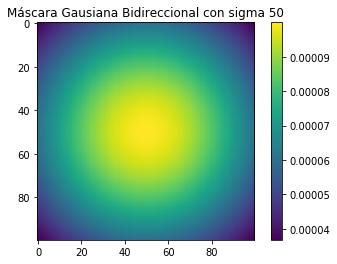

In [7]:
def masc_gaus2D(sigma, n):
    gauss = masc_gaus(sigma, n)[np.newaxis]
    return gauss.T * gauss

ax = plt.imshow(masc_gaus2D(50, 100))
plt.title("Máscara Gausiana Bidireccional con sigma 50")
plt.colorbar(ax)
plt.show()

Para crear un filtro gausiano bidireccional multiplicamos dos máscaras gausianas unidireccionales de forma que nos produzcan una matriz. El resultado de esta multiplicación puede verse en la figura anterior

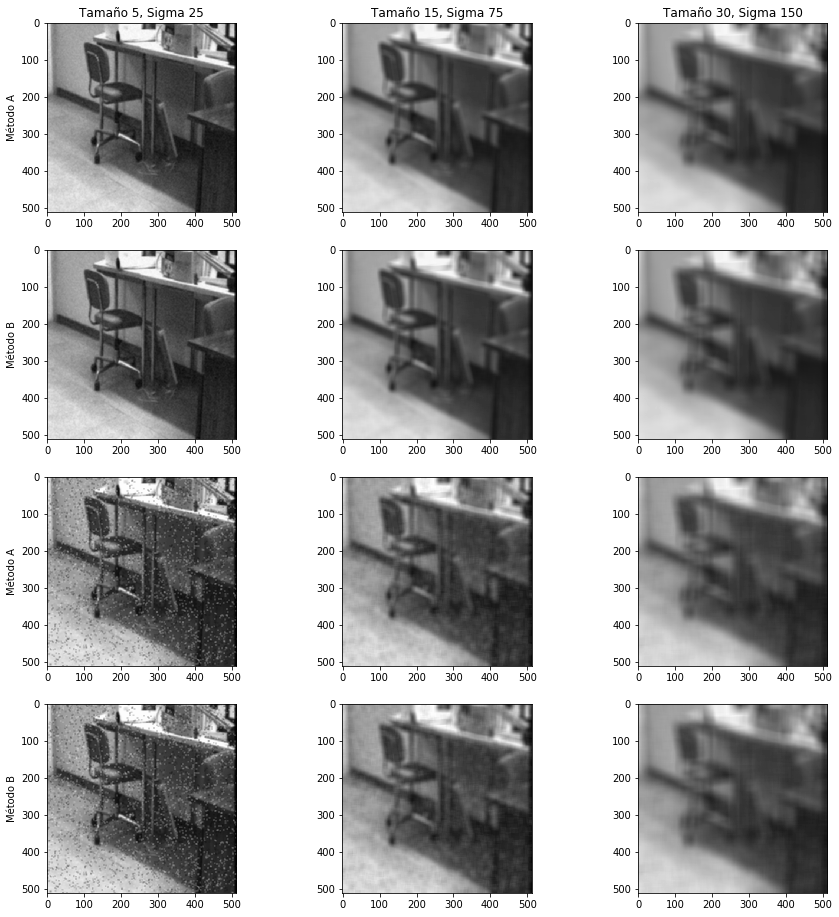

In [8]:
fig, axs = plt.subplots(4, 3, figsize=(15, 16))

kernels = (5, 15, 30)

axs[0][0].set_ylabel('Método A')
axs[1][0].set_ylabel('Método B')
axs[2][0].set_ylabel('Método A')
axs[3][0].set_ylabel('Método B')

for i, x in enumerate(kernels):

    sigma = x * 5
    
    mask2D = masc_gaus2D(sigma, x)
    mask = masc_gaus(sigma, x)
    
    axs[0][i].title.set_text("Tamaño {}, Sigma {}".format(x, sigma))

    axs[0][i].imshow(convolve(escgaus, weights=mask2D), cmap='gray', vmin=0, vmax=255)
    escgausConv = convolve1d(convolve1d(escgaus, weights=mask, axis=0), weights=mask, axis=1)
    axs[1][i].imshow(escgausConv, cmap='gray', vmin=0, vmax=255)

    axs[2][i].imshow(convolve(escimp5, weights=mask2D), cmap='gray', vmin=0, vmax=255)
    escimp5Conv = convolve1d(convolve1d(escimp5, weights=mask, axis=0), weights=mask, axis=1)
    axs[3][i].imshow(escimp5Conv, cmap='gray', vmin=0, vmax=255)

En las imágenes anteriores se puede observar el efecto del filtro gausiano bidimensional. Se ha realizado de dos formas, multiplicando las máscaras unidimensionales y luego posteriormente usando la matriz resultante en una convolución con la imagen, al que hemos llamado método A y el método B al que a la imagen se le aplican 2 convoluciones con la máscara unidimensional gausiana, una horizontal y otra vertical. Se puede observar que el resultado es el mismo, pero este último método usa menos calculos, por lo que es más eficiente.

En las imagenes de las 2 primeras filas se puede apreciar como el ruido gausiano desaparece, aunque la imagen también se ve desenfocada. En las 2 últimas filas la imagen tiene un ruido que no es gausiano, por lo que este no desaparece y solo se ve desenfocado como el resto de la imagen.

**Ejercicio 4.** Escribe una función ``masc_deriv_gaus(sigma, n)`` que construya una máscara de una dimensión de un
filtro derivada del gaussiano de tamaño *n* y varianza σ. Filtra la imagen ``telefonica.jpg`` con filtros bidimensionales de derivada
del gaussiano para extraer los bordes de la imagen. Prueba con diferentes valores de *n* y/o σ.

Muestra y discute los resultados. Pinta alguna de las máscaras construidas.

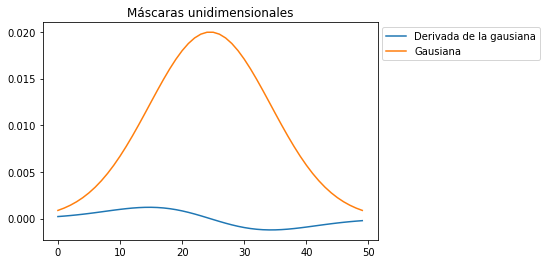

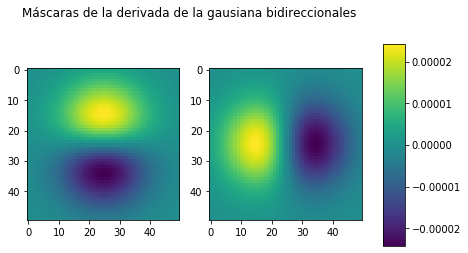

In [9]:
def deriv_gauss(x, sigma):
    return - x/sigma**2 * np.exp(-1/2 * (x/sigma)**2)

def masc_deriv_gaus(sigma, n):
    pos = np.linspace(-n/2, n/2, n)
    return np.array([deriv_gauss(x, sigma) / n for x in pos])

plt.title('Máscaras unidimensionales')
plt.plot(masc_deriv_gaus(10, 50), label='Derivada de la gausiana')
plt.plot(masc_gaus(10, 50), label='Gausiana')
plt.legend(loc='upper right',  bbox_to_anchor=(1, 0, 0.5, 1))

img1 = masc_deriv_gaus(10, 50)[np.newaxis].T @ masc_gaus(10, 50)[np.newaxis]
img2 = masc_gaus(10, 50)[np.newaxis].T @ masc_deriv_gaus(10, 50)[np.newaxis]

fig, axs = plt.subplots(1, 2)
fig.suptitle('Máscaras de la derivada de la gausiana bidireccionales')
axs[0].imshow(img1)
im = axs[1].imshow(img2)
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
plt.colorbar(im, cax=cbar_ax)
plt.show()

In [10]:
def to_rgb(gray_mask):
    return np.repeat(gray_mask, 3).reshape(gray_mask.shape[0], gray_mask.shape[1], 3)

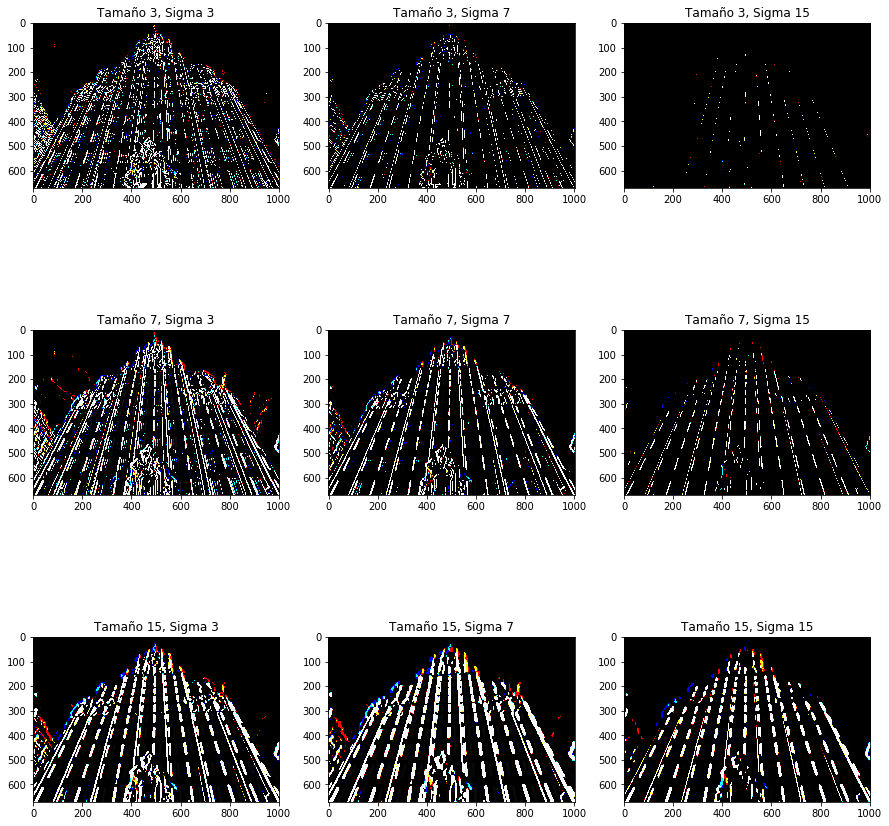

In [11]:
def masc_deriv_gaus2DH(sigma, x):
    return masc_gaus(sigma, x)[np.newaxis].T @ masc_deriv_gaus(sigma, x)[np.newaxis]

fig, axs = plt.subplots(3, 3, figsize=(15, 16))

kernels = (3, 7, 15)
sigmas = (3, 7, 15)

i = 0

for i, x in enumerate(kernels):
    for j, sigma in enumerate(sigmas):
        mask = masc_deriv_gaus2DH(sigma, x)
        mask_rgb = to_rgb(mask)

        conv = convolve(telefonica, weights=mask_rgb)
        axs[i][j].title.set_text('Tamaño {}, Sigma {}'.format(x, sigma))
        axs[i][j].imshow(conv, vmin=0, vmax=255)


En las imágenes anteriores se ha aplicado el filtro horizontal bidimensional de derivada del gaussiano con diferentes sigmas y tamaños de máscara. Se puede observar que según se aumenta el tamaño de la máscara, los bordes se vuelven más gruesos y los bordes menos importantes comienzan a desaparecer. Cuando el parámetro sigma crece el filtro empieza a solo dibujar los bordes más importantes. En estos casos nos referimos a bordes importantes a aquellos que están formados por grandes diferencias entre el color de los píxeles.

**Ejercicio 5.** Utiliza la función ``median_filter`` del paquete ``scipy.ndimage``
que realice el filtrado de la imagen con un filtro de la mediana de tamaño *n* × *n*.

Muestra y discute los resultados para diferentes valores del parámetro *n* en ambas imágenes. Compáralos con los obtenidos en el Ejercicio 3.

**Ejercicio 6.** Utiliza la funcion ``cv2.bilateralFilter()`` de OpenCV para realizar el filtrado bilateral de una
imagen. Selecciona los parámetros adecuados y aplícalo a las imágenes ``tapiz.jpg``, ``escgaus.bmp`` y ``escimp5.bmp`` y otras que elijas tú.

Si llamamos $\sigma_r$ a la varianza de de la gaussiana que controla la ponderación debida a la diferencia entre los valores de los píxeles y $\sigma_s$ a la varianza de la gaussiana que controla la ponderación debida a la posición de los píxeles. Responde a la siguientes preguntas:
* ¿Cómo se comporta el filtro bilateral cuando la varianza $\sigma_r$ es muy alta? ¿En este caso qué ocurre si $\sigma_s$ es alta o baja?
* ¿Cómo se comporta si $\sigma_r$ es muy baja? ¿En este caso cómo se comporta el filtro dependiendo si $\sigma_s$ es alta o baja?

Muestra y discute los resultados para distintos valores de los parámetros, tanto para las imágenes contaminadas con ruido gaussiano como impulsivo. Compáralos con los obtenidos en los Ejercicios 3 y 5.

## Transformada Hough

**Ejercicio 7.** Utiliza la función ``cv2.HoughLines()`` de OpenCV para encontrar líneas en la imagen ``telefonica.jpg``. Para extraer los bordes de la imagen utiliza las funciones escritas más arriba. 

Discute el funcionamiento para distintos valores de los parámetros de la función, así como de
los filtros utilizados para extraer los bordes de la imagen. Pinta los resultados sobre la imagen (te proporcionamos algo de código por si fuese útil).

In [12]:
import cv2
import matplotlib.pyplot as plt

def draw_lines(img, lines, color=(0, 0, 255), thickness=2):
    """
    Draws a set of lines detected using the OpenCV Hough transform
    :param img: An input image in BGR format of type np.int8
    :param lines: List or Numpy array containing the parameters of the homogeneous line as: ax + by + c = 0
    :param color: The color used to draw the lines. Red by default.
    :param thickness: The thickness of the lines to be drawn
    """
    if lines is not None:
        for i in range(len(lines)):
            eq = lines[i]
            rho = -eq[2]
            a = eq[0]
            b = eq[1]
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 - 1000 * b)
            y1 = int(y0 + 1000 * a)
            x2 = int(x0 + 1000 * b)
            y2 = int(y0 - 1000 * a)

            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
            
################################################################################

lines = np.squeeze(cv2.HoughLines( ... ))
# Convert the lines to homogeneous coordinates
lines = np.array([np.cos(lines[:, 1]), np.sin(lines[:, 1]), -lines[:, 0]]).T

# Draw andshow the lines
draw_lines(img, lines)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

TypeError: HoughLines() missing required argument 'rho' (pos 2)

## Segmentación

**Ejercicio 10.** Escribe una función que segmente el objeto central de una imagen a partir de una segmentación manual
inicial realizada por el usuario. Puedes utilizar el código proporcionado en el archivo ``segm.py``. En la optimización
1. toma como afinidad entre una pareja de píxeles la
diferencia en sus valores de color y;
2. sólo establece los términos unitarios de los píxeles
marcados por el usuario.

Aplícalo al menos a las imágenes ``persona.png`` y ``horse.jpg``. Muestra y discute los resultados.

In [13]:
#################################
# Segmentacion de imagen a la "Grab Cut" simplificado
# por Luis Baumela. UPM. 15-10-2015
# Vision por Computador. Master en Inteligencia Artificial
#################################


import numpy as np
import maxflow
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, './code')
import select_pixels as sel


def segment(imgName, func):
    img = plt.imread(imgName)
    
    print(img.shape)

    # Marco algunos pixeles que pertenecen el objeto y el fondo
    markedImg = sel.select_fg_bg(img)

    # Create the graph.
    g = maxflow.Graph[float]()

    # Add the nodes. nodeids has the identifiers of the nodes in the grid.
    nodeids = g.add_grid_nodes(img.shape[:2])

    h, w =img.shape[:2]

    # Calcula los costes de los nodos no terminales del grafo
    # Estos son los costes de los vecinos horizontales
    exp_aff_h = np.ones(img.shape[:2])
    # Estos son los costes de los vecinos verticales
    exp_aff_v = np.ones(img.shape[:2])
    for i in range(0, h):
        for j in range(1, w):
            exp_aff_h[i, j] = func(img[i][j], img[i][j-1])
            exp_aff_v[i, j] = func(img[i][j], img[i-1][j])

    # Construyo el grafo 
    # Para construir el grafo relleno las estructuras
    hor_struc=np.array([[0, 0, 0],
                        [1, 0, 0],
                        [0, 0, 0]])

    ver_struc=np.array([[0, 1, 0],
                        [0, 0, 0],
                        [0, 0, 0]])
    # Construyo el grafo 
    g.add_grid_edges(nodeids, exp_aff_h, hor_struc,symmetric=True)
    g.add_grid_edges(nodeids, exp_aff_v, ver_struc,symmetric=True)

    # Leo los pixeles etiquetados
    # Los marcados en rojo representan el objeto
    pts_fg = np.transpose(np.where(np.all(np.equal(markedImg,(255,0,0)),2)))
    # Los marcados en verde representan el fondo
    pts_bg = np.transpose(np.where(np.all(np.equal(markedImg,(0,255,0)),2)))

    # Incluyo las conexiones a los nodos terminales
    # Pesos de los nodos terminales
    weight_default = -np.inf
    g.add_grid_tedges(nodeids[pts_fg[:,0],pts_fg[:,1]], weight_default, np.inf)
    g.add_grid_tedges(nodeids[pts_bg[:,0],pts_bg[:,1]], np.inf, weight_default)

    # Find the maximum flow.
    g.maxflow()
    # Get the segments of the nodes in the grid.
    sgm = g.get_grid_segments(nodeids)

    # Muestro el resultado de la segmentacion
    plt.figure()
    plt.imshow(np.uint8(np.logical_not(sgm)),cmap='gray')
    plt.show()

    # Lo muestro junto con la imagen para ver el resultado
    plt.figure()
    wgs=(np.float_(np.logical_not(sgm))+0.3)/1.3

    # Replico los pesos para cada canal y ordeno los indices
    wgs=np.rollaxis(np.tile(wgs,(3,1,1)),0,3)
    plt.imshow(np.uint8(np.multiply(img,wgs)))
    plt.show()


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


(375, 500, 3)


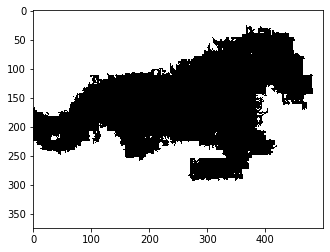

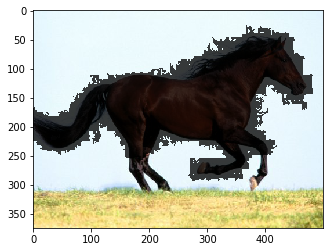

In [53]:
def default(ip, iq):
    factor = .7
    return np.abs(ip - iq).mean() * factor 

segment('imagenes/horse.jpg', default)

Como se puede observar el caballo ha sido segmentado, pero delimitandolo de una manera muy imprecisa. Esto es debido a que hemos usado como función de afinidad la diferencia de los pixeles. La media se aplica para convertir los valores rgb a un solo valor en escala de grises.

**Ejercicio 11.** Mejora el algoritmo anterior. Sugerencia:
* Refina la segmentación iterativamente.
* Mejora la función de afinidad entre píxeles.
* Mejora los términos unitarios

mejora los resultados de algunas de las imágenes anteriores. Muestra y discute los resultados.

(375, 500, 3)


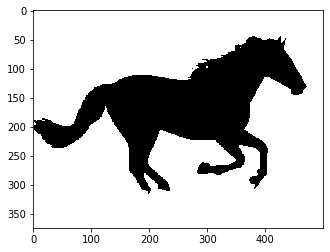

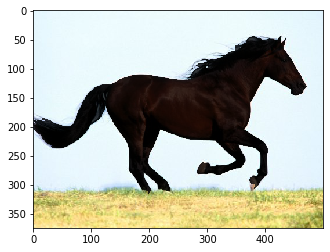

In [19]:
def bpq(ip, iq):
    sigma = 0.6
    return np.exp(- (ip.mean() - iq.mean())**2 / 2*sigma**2)

segment('imagenes/horse.jpg', bpq)
# segment('imagenes/persona.png', bpq) # Falla

En este ejemplo hemos usado la función Boundary Costs descrita en el paper GraphCuts. No se incluye el segundo termino de la multiplicación porque la distancia entre pixeles es 1 y se realiza la media para obtener el nivel de gris.

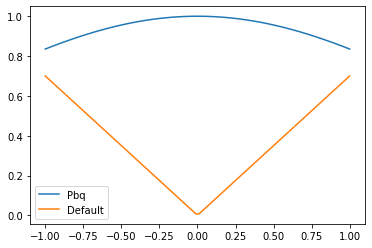

In [57]:
ranges = np.linspace(-1, 1, 100)

plt.plot(ranges, [bpq(np.array([x, x, x]), np.zeros(3)) for x in ranges], label='Pbq')
plt.plot(ranges, [default(np.array([x, x, x]), np.zeros(3)) for x in ranges], label='Default')
plt.legend()
plt.show()